# Environmetal sound classification


<a href="https://colab.research.google.com/github/GianmarcoLattaruolo/Vision_Project/blob/main/Vision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis




Run this cell again if you modify some scripts.

In [10]:
import sys  
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
from scipy.io import wavfile
import seaborn as sb
sb.set(style="white", palette="muted")
import pandas as pd
import IPython.display
import random
from scipy import signal


#libraries
main_dir = os.getcwd()
module_path = main_dir
if module_path not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(module_path)

import importlib
imported_module = importlib.import_module("Preprocessing.data_loader")
importlib.reload(imported_module)
imported_module = importlib.import_module("Preprocessing.exploration_plots")
importlib.reload(imported_module)
imported_module = importlib.import_module("Preprocessing.clip_utils")
importlib.reload(imported_module)
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, power_spectrum_plot, plot_clip_overview

Run this cell once to download the dataset.


In [11]:
in_colab = 'google.colab' in sys.modules
if in_colab:
    print('Downloading the ESC-50 dataset')
    download_dataset('ESC-50')

## Base Exploration of the dataset

In this cell we can listen to one random audio in our dataset (different every time we run the cell). 
Moreover we visualize a portion of the audio.


The sample rate is44100
The data shape is (220500,)
Audio category: train


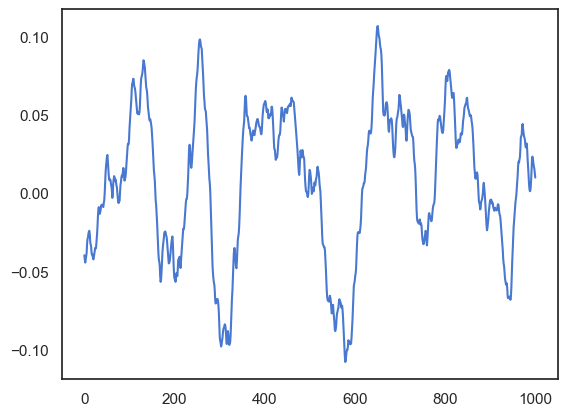

In [12]:
audio, samplerate = one_random_audio(main_dir)

Text(0.5, 1.0, 'Spectrogram: Input ((220500,), 1102, 441) > Output (552, 332)')

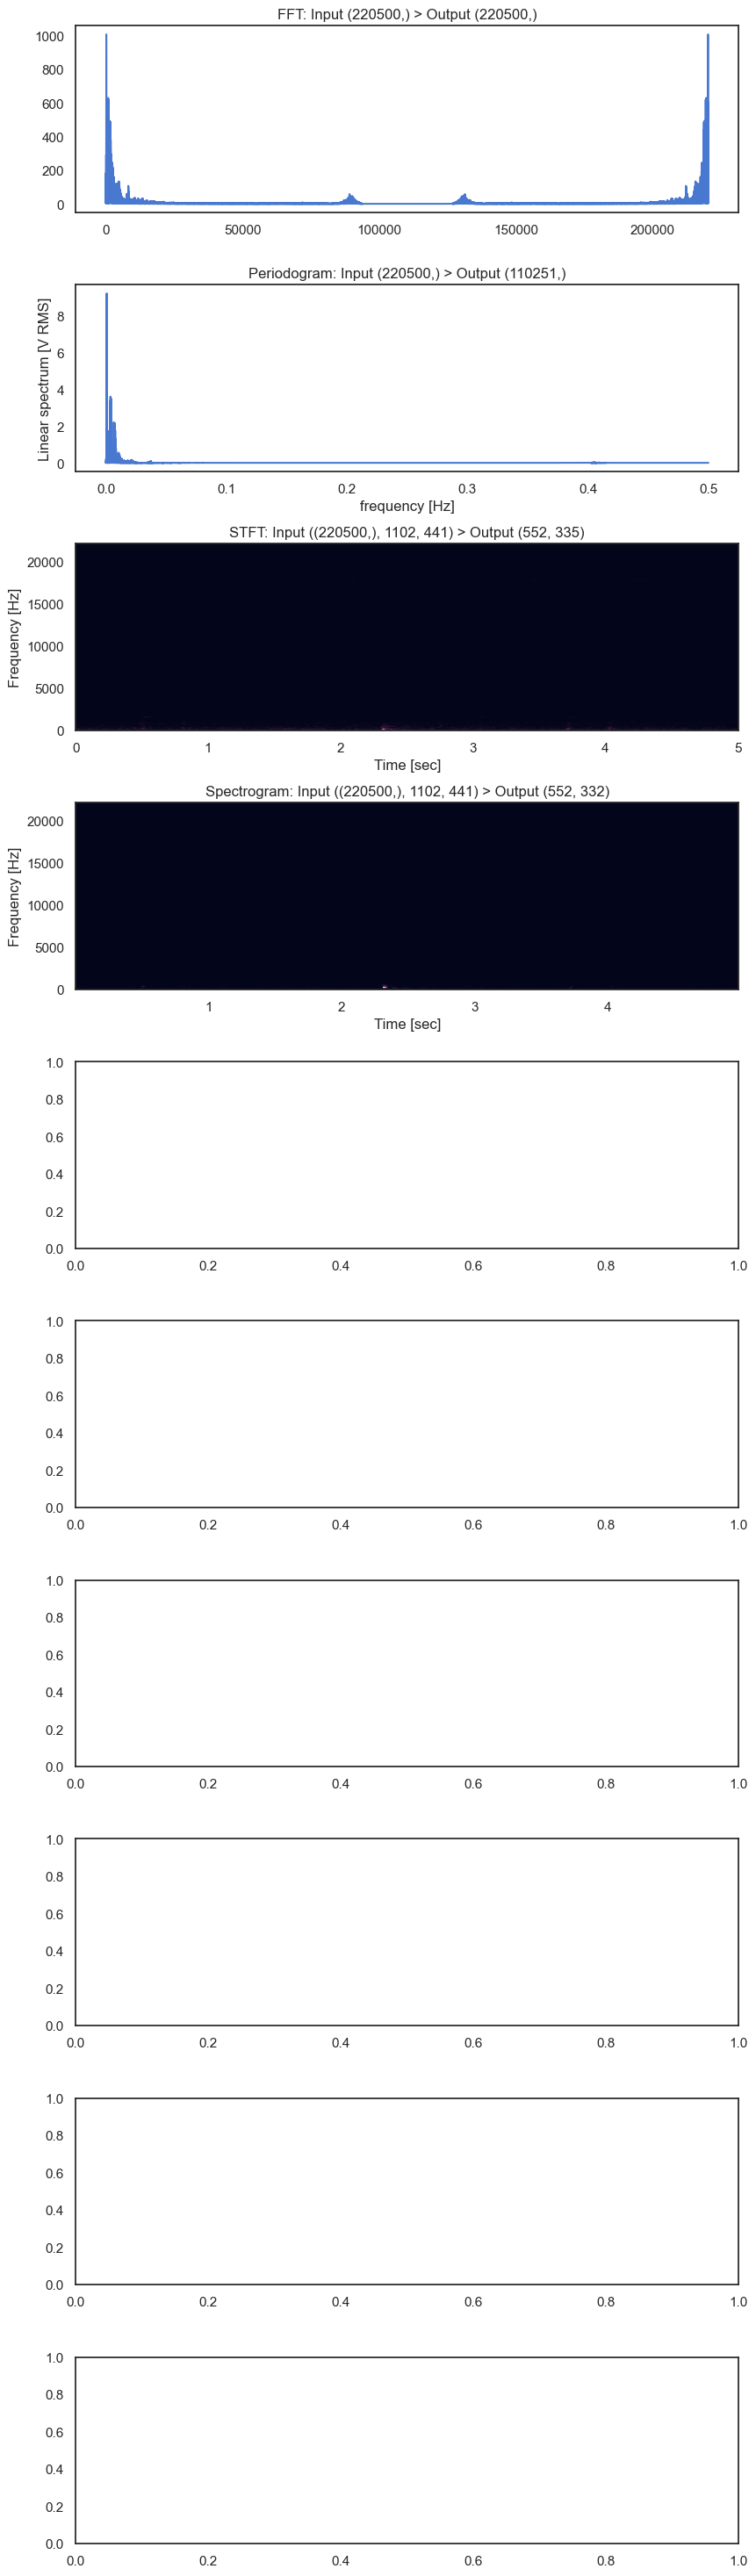

In [13]:
#type of spectrum, transformation windows ecc:
from scipy.fft import fft,ifft,fftfreq, fftshift
from scipy.signal import stft,spectrogram,periodogram

sample_rate = 44100
segment=25
overlapping=10 #in milliseconds

nperseg = round(sample_rate * segment / 1000)  # Calculate the number of samples per segment
noverlap = round(sample_rate * overlapping / 1000)

plt.subplots(10, 1, figsize=(9, 30))
plt.tight_layout(pad=3)
#plt.title(f': Input {.shape} > Output {.shape}')
# SCIPY

y_hat = fft(audio)
plt.subplot(10,1,1)
plt.plot(np.abs(y_hat))
plt.title(f'FFT: Input {audio.shape} > Output {y_hat.shape}')

f, y_norm = periodogram(audio)
plt.subplot(10,1,2)
plt.plot(f , y_norm)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title(f'Periodogram: Input {audio.shape} > Output {y_norm.shape}')

f, t, stft_y = stft(audio,fs = samplerate, nperseg=nperseg, noverlap=noverlap)
plt.subplot(10,1,3)
plt.pcolormesh(t, f, np.abs(stft_y),shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'STFT: Input {audio.shape, nperseg, noverlap} > Output {stft_y.shape}')

f,t , spec_y = spectrogram(audio, fs = samplerate, nperseg=nperseg, noverlap=noverlap)
plt.subplot(10,1,4)
plt.pcolormesh(t, f, spec_y)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'Spectrogram: Input {audio.shape, nperseg, noverlap} > Output {spec_y.shape}')

#LIBROSA



Let's see a periodogram (power spectrum) for our clip.

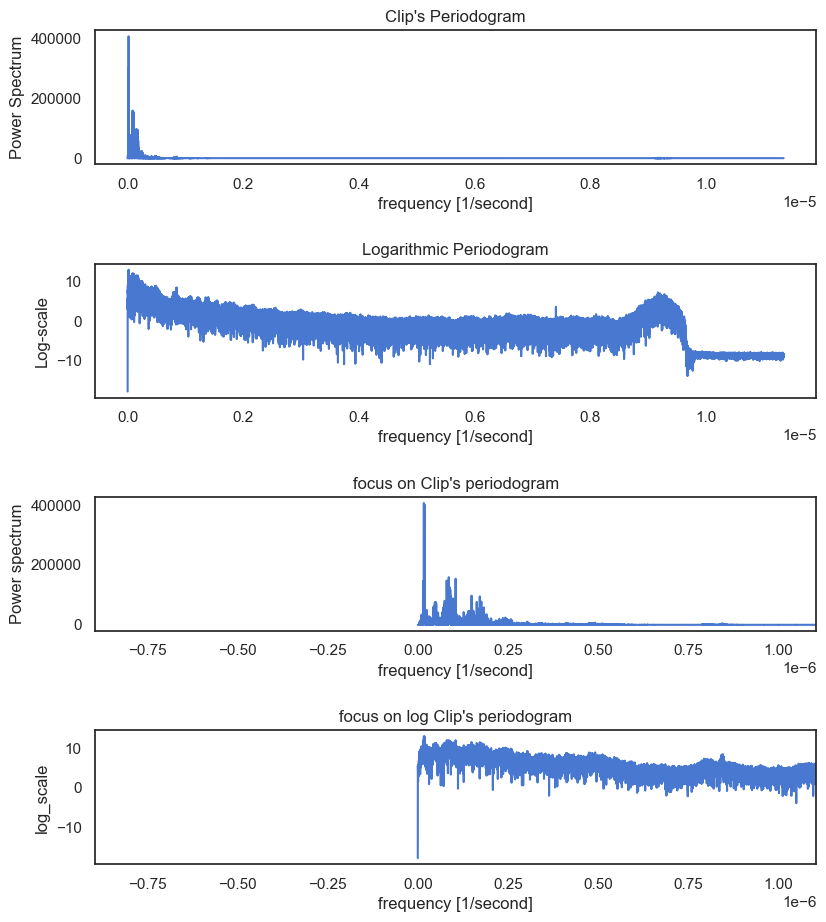

In [14]:
power_spectrum_plot(audio, samplerate)

We can say that, as we expected, this type of analysis on the entire audio clip is meaningless. We'll need to fragment the audio clips.
But first let's produce some summary statistics about our dataset.

In [15]:
df_ESC10, df_ESC50 , df_ESC_US = load_metadata(main_dir, ESC_US = True)
# default values are:
# heads = True, statistics = False, audio_listen = False, ESC50=True, ESC10=True, ESC_US=False

filename  fold  target        category  esc10  src_file take  \
0   1-100032-A-0.wav     1       0             dog   True    100032    A   
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A   
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A   
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B   
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A   

                                           full_path  
0  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
1  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
2  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
3  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
4  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...

Classes in the full dataset  are perfectly balanced
 Counter({'dog': 40, 'chirping_birds': 40, 'vacuum_cleaner': 40, 'thunderstorm': 40, 'door_wood_knock': 40, 'can_opening': 40, 'crow': 40, 'clapping': 40, 'fireworks': 40, 'chainsaw': 40, 'airplane': 40, 'mouse_click': 40, 'pouring_water': 40, 'train': 40, 'sheep': 40, 'water_drops': 40, 'church_bells': 40, 'clock_alarm': 40, 'keyboard_typing': 40, 'wind': 40, 'footsteps': 40, 'frog': 40, 'cow': 40, 'brushing_teeth': 40, 'car_horn': 40, 'crackling_fire': 40, 'helicopter': 40, 'drinking_sipping': 40, 'rain': 40, 'insects': 40, 'laughing': 40, 'hen': 40, 'engine': 40, 'breathing': 40, 'crying_baby': 40, 'hand_saw': 40, 'coughing': 40, 'glass_breaking': 40, 'snoring': 40, 'toilet_flush': 40, 'pig': 40, 'washing_machine': 40, 'clock_tick': 40, 'sneezing': 40, 'rooster': 40, 'sea_waves': 40, 'siren': 40, 'cat': 40, 'door_wood_creaks': 40, 'crickets': 40})


filename  fold  target        category  src_file take  \
0    1-100032-A-0.wav     1       0             dog    100032    A   
14   1-110389-A-0.wav     1       0             dog    110389    A   
24  1-116765-A-41.wav     1      41        chainsaw    116765    A   
54   1-17150-A-12.wav     1      12  crackling_fire     17150    A   
55  1-172649-A-40.wav     1      40      helicopter    172649    A   

                                            full_path  
0   /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
14  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
24  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
54  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
55  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...

Classes in ESC10 
 ['crackling_fire', 'rooster', 'sea_waves', 'clock_tick', 'helicopter', 'dog', 'crying_baby', 'sneezing', 'rain', 'chainsaw']
Loading the 1/2 folder of unlabeled data 
Loading the 2/2 folder of unlabeled data 
We have 20000 unlabeled audios.


filename                                          full_path
0    016514-31948-40-45.ogg  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...
1      019507-35054-0-5.ogg  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...
2  016972-32311-300-305.ogg  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...
3    016774-32197-50-55.ogg  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...
4  014522-29650-260-265.ogg  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...

## Spectrogram Analysis

Now we dig in the analysis exploiting the natural structure of sound in nature. 
In particular we'll need the [Short-Time Fourier Transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).

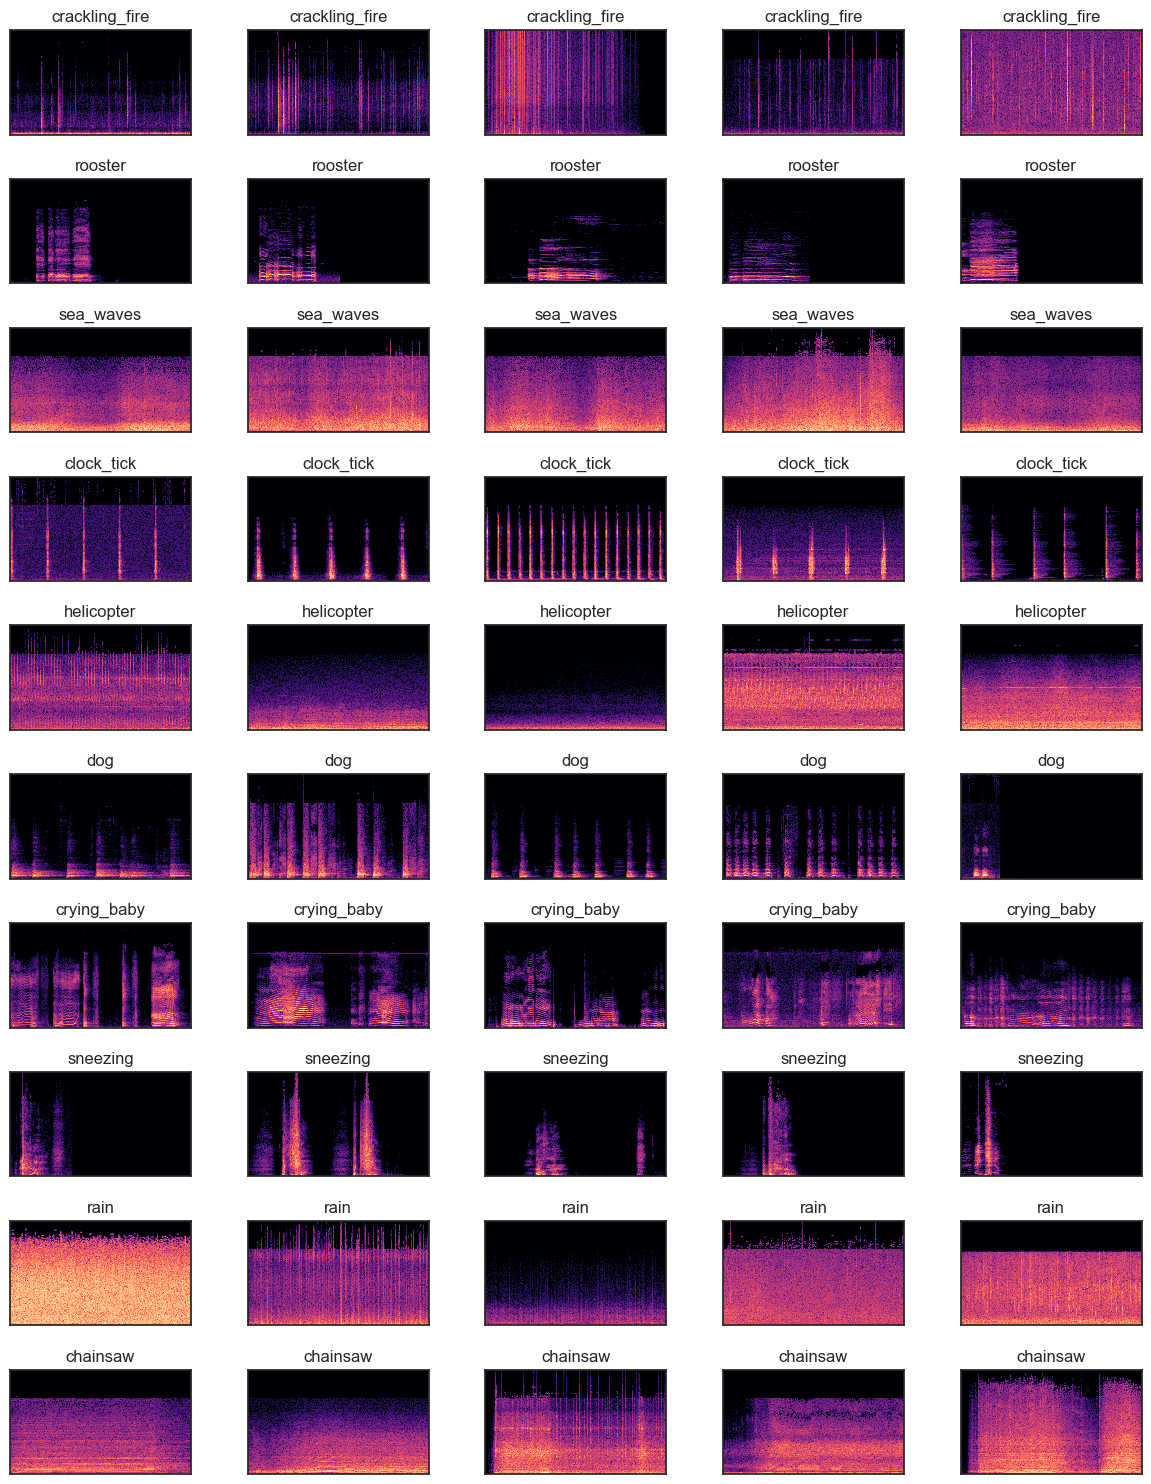

In [16]:
plot_clip_overview(df_ESC10) #clearly you can pass only df_ESC10 or df_ESC50

In [17]:
#audio = r'C:\Users\latta\GitHub\Human_Data_Analytics_Project_2023\data\ESC-50\1-137-A-32.wav'
audio = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-137-A-32.wav'
y, sr = librosa.load(audio,sr=44100)
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-4.5337439e+02, -5.6834198e+02, -5.0387729e+02, ...,
        -3.4366354e+02, -1.3529082e+02, -3.7128345e+02],
       [ 1.3434491e+02,  1.7694389e+02,  1.2607414e+02, ...,
         1.5418506e+02,  1.3391547e+02,  1.7108144e+02],
       [-8.1748438e+00, -3.6898050e+00, -7.4755493e+01, ...,
        -7.2405151e+01, -8.7364182e+01, -5.1034069e+01],
       ...,
       [ 2.1181242e+00,  5.0022650e+00,  3.5919719e+00, ...,
         8.3187742e+00,  8.8611698e+00, -4.1883123e-01],
       [-1.3518436e+00,  2.6005309e+00, -1.2373867e+00, ...,
         5.2695870e+00, -8.0891695e+00,  8.6519778e-01],
       [ 2.9803199e-01,  5.3931212e-01, -1.4929016e+00, ...,
        -8.0441837e+00, -9.1008205e+00, -8.1665707e+00]], dtype=float32)

## Auxiliary Classes

In [13]:

class Clip():
    """A single 5-sec long recording."""
    
    samplerate = 44100   # All recordings in ESC are 44.1 kHz
    frame = 512    # Frame size in samples
    
    def __init__(self, path):
        self.path = path
        y,sr = librosa.load(self.path,sr=samplerate)
        self.raw = y
        

    #cosa vogliamo che faccia la classe che fa il load della singola clip audio?


## Tensorflow dataset

In [18]:
df_ESC10

filename  fold  target        category  src_file take  \
0      1-100032-A-0.wav     1       0             dog    100032    A   
14     1-110389-A-0.wav     1       0             dog    110389    A   
24    1-116765-A-41.wav     1      41        chainsaw    116765    A   
54     1-17150-A-12.wav     1      12  crackling_fire     17150    A   
55    1-172649-A-40.wav     1      40      helicopter    172649    A   
...                 ...   ...     ...             ...       ...  ...   
1876   5-233160-A-1.wav     5       1         rooster    233160    A   
1888   5-234879-A-1.wav     5       1         rooster    234879    A   
1889   5-234879-B-1.wav     5       1         rooster    234879    B   
1894  5-235671-A-38.wav     5      38      clock_tick    235671    A   
1999     5-9032-A-0.wav     5       0             dog      9032    A   

                                              full_path  
0     /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
14    /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
24    /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
54    /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
55    /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
...                                                 ...  
1876  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
1888  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
1889  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
1894  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  
1999  /Users/leonardo/Desktop/HDA/Human_Data_Analyti...  

[400 rows x 7 columns]

In [19]:
import tensorflow as tf
tf_df = tf.data.Dataset.from_tensor_slices((df_ESC10['full_path'].values,df_ESC10['target'].values))

2023-05-21 02:06:17.581840: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 02:06:17.586627: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [20]:
for i,j in tf_df:
    print(i,j)
    break

tf.Tensor(b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int64)


In [201]:
import tensorflow as tf
import pandas as pd

# Load your df_ESC10 DataFrame from Pandas or create one if you haven't done so yet

# Define a function to read audio files from the full path
@tf.function
def load_audio(filename, target):
    print(type(filename))
    binary = tf.get_static_value(filename)
    print(binary)
    path = binary.decode('UTF-8')
    file , _ = librosa.load(path, sr=44100)
    return tf.data.Dataset.from_tensor_slices((file,target))

# Create a TensorFlow DataFrame
tf_df = tf.data.Dataset.from_tensor_slices((df_ESC10['full_path'].values, df_ESC10['target'].values))


In [202]:
# Map the read_audio_file function to the 'full_path' column to replace it with the actual audio data
tf_df = tf_df.map(load_audio)

<class 'tensorflow.python.framework.ops.Tensor'>
None


AttributeError: in converted code:

    /var/folders/bn/q7hx91b1081fm2grcj1g9npm0000gn/T/ipykernel_81338/663090387.py:13 load_audio  *
        path = binary.decode('UTF-8')

    AttributeError: 'NoneType' object has no attribute 'decode'


In [186]:
for filename,j in tf_df:
    binary = tf.get_static_value(filename)
    print(binary)
    path = binary.decode('UTF-8')
    file , _ = librosa.load(path, sr=44100)

    break



b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav'
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [159]:
type(tensor_array.decode('ASCII'))

str